# Microsoft Streaming Movies Analysis

**Author:** Lili Beit
***

## Overview

Microsoft wants to enter the movie business as a creator of original content.  My task is to advise them on how to make popular movies that will draw subscribers to its new streaming video service.  I used data from IMDb, the Internet Movie Database, to investigate three questions:

1. Which movie genres are the most popular?
2. Does the length of a movie affect its ratings and popularity?
3. Who are the top actors and directors in the popular genres?

To measure a film's popularity, I used the product of its average rating and the number of people who rated it.  To find the most popular genres, I calculated the median popularity value for each genre.  I discovered that the most popular movie genres among IMDb users are Action, Crime, and Adventure.  I also analyzed the length of movies in these genres, and found that a longer runtime is correlated with increased popularity.  I then found the 30 actors and directors who have made the most popular movies in these genres.  

To successfully break into the streaming movie business, Microsoft should focus on Action, Crime, and Adventure movies, and should recruit actors and directors with a proven track record in these genres.  They should also make movies that are longer than average: around 105-110 minutes.


## Business Problem

Microsoft sees big tech companies such as Amazon, Netflix, and Hulu successfully drawing customers with streaming video services featuring original content, and so has decided to enter the streaming space.  Microsoft hopes its existing subscription-based customers will pay more for access to movie content.  They hope to lure subscribers with original movies, but don't know anything about how to make movies that are highly rated and appeal to a wide audience.  They need to generate a few "big win" movies to kickstart their entry into the streaming arena.


## Data Understanding

To analyze this problem, I used data from IMDb, the Internet Movie Database.  IMDb contains information on over 140,000 movies, including actors, genres, runtimes, and ratings.  While IMDb does collect information from filmakers, the bulk of its data are submitted by  individuals in the movie industry and visitors to the IMDb website.  IMDb routinely checks its data for accuracy and welcomes corrections from its users.

IMDb users are a good proxy for the customers Microsoft seeks to recruit: people who are internet-savvy and passionate about movies.  Thus, the number of ratings and average rating for movies on IMDb are suitable gauges for potential customers' reactions to Microsoft's new movies.

## Data Preparation

I restricted the IMDb data to movies with over 15 user ratings, since ratings from a small sample of users may not match the reaction of a larger audience.  I also limited the data to movies made in the last 10 years (in 2010 or later), since these provide the best data on currently available actors and directors.  Additionally, I excluded  movies with no recorded genres and no recorded runtimes, since my analysis is based on these variables.

After implementing the above restrictions, I arrived at a sample of over 50,000 movies.

Using the IMDb ratings data, I created a new variable, Popularity, which is simply the product of a movie's average rating and the number of people who rated it.  This is the variable I have chosen to define a movie's success, since it combines the size of the movie's audience with its average rating by those viewers.  To successfully break into the streaming movie space, Microsoft needs to make movies which are not only highly rated, but also appeal to a large number of people.

#### Import standard python packages and IMDb data

In [1]:
# import standard packages

import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import IMDB actor/crew name data
imdb_name_df = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz',compression='gzip')
imdb_name_df.info()
imdb_name_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [3]:
# import IMDB title/basic info data
imdb_title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz', compression='gzip')
imdb_title_basics_df.info()
imdb_title_basics_df.head()
# imdb_title_basics_df.describe()
# looks like this only contains movies since 2010
# there are a couple of impossible values for year and runtime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy"


In [4]:
#import IMDB principals data
imdb_title_principals_df = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz', compression='gzip')
imdb_title_principals_df.info()
imdb_title_principals_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [5]:
#import IMDB ratings data
imdb_title_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz', compression='gzip')
imdb_title_ratings_df.info()
imdb_title_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,tconst,averagerating,numvotes
0,tt10356526,8.30000,31
1,tt10384606,8.90000,559
2,tt1042974,6.40000,20
3,tt1043726,4.20000,50352
4,tt1060240,6.50000,21


#### Combine the above tables into a dataframe showing movie titles, genres, and ratings 


In [6]:
# create imdb dataframe with titles, genres, and ratings
imdb_df = imdb_title_basics_df.merge(imdb_title_ratings_df,how='left', on='tconst')
#146144 entries

#drop unnecessary columns
imdb_df.drop(columns=['original_title'], inplace=True)

#drop movies made prior to 2010
imdb_df = imdb_df.loc[imdb_df['start_year'] >= 2010]
#no change in number of entries, since min year in data is 2010

imdb_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.00000,77.00000
1,tt0066787,One Day Before the Rainy Season,2019,114.00000,"Biography,Drama",7.20000,43.00000
2,tt0069049,The Other Side of the Wind,2018,122.00000,Drama,6.90000,4517.00000
3,tt0069204,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10000,13.00000
4,tt0100275,The Wandering Soap Opera,2017,80.00000,"Comedy,Drama,Fantasy",6.50000,119.00000
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.00000,Drama,nan,nan
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary,nan,nan
146141,tt9916706,Dankyavar Danka,2013,nan,Comedy,nan,nan
146142,tt9916730,6 Gunn,2017,116.00000,NaN,nan,nan


#### Drop records with few or no ratings, no genre assigned, or no runtime recorded

In [7]:
# drop rows with a low number of ratings, 
# since ratings may not reflect the reaction of a larger population

imdb_df['numvotes'].describe()
# dropping rows with null ratings will eliminate about half the sample
# dropping rows with fewer than 15 ratings will eliminate 25% of the remaining sample
# these steps are necessary to analyze movie popularity
# and still leave us with over 54,000 movies to analyze

count     73856.00000
mean       3523.66217
std       30294.02297
min           5.00000
25%          14.00000
50%          49.00000
75%         282.00000
max     1841066.00000
Name: numvotes, dtype: float64

In [8]:
#drop rows with number of rating votes < 15
imdb_df = imdb_df.loc[imdb_df['numvotes'] >= 15]
# 54684 entries

#reset index
imdb_df.reset_index(inplace=True, drop=True)

imdb_df
# imdb_df.info() # some movies are missing runtime or genres - drop these next
# imdb_df.describe() # popularity variable has a huge Standard Deviation - many extreme outliers

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.00000,77.00000
1,tt0066787,One Day Before the Rainy Season,2019,114.00000,"Biography,Drama",7.20000,43.00000
2,tt0069049,The Other Side of the Wind,2018,122.00000,Drama,6.90000,4517.00000
3,tt0100275,The Wandering Soap Opera,2017,80.00000,"Comedy,Drama,Fantasy",6.50000,119.00000
4,tt0112502,Bigfoot,2017,nan,"Horror,Thriller",4.10000,32.00000
...,...,...,...,...,...,...,...
54679,tt9904844,Ott Tänak: The Movie,2019,125.00000,Documentary,8.70000,218.00000
54680,tt9905412,Ottam,2019,120.00000,Drama,8.10000,505.00000
54681,tt9905462,Pengalila,2019,111.00000,Drama,8.40000,600.00000
54682,tt9911774,Padmavyuhathile Abhimanyu,2019,130.00000,Drama,8.40000,365.00000


In [9]:
# drop rows with null values for 'genre' or 'runtime'
# eliminates about 4,000 records
# but still leaves us over 50,000 movies to analyze

imdb_df.dropna(subset=['genres','runtime_minutes'], inplace=True)
imdb_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.00000,77.00000
1,tt0066787,One Day Before the Rainy Season,2019,114.00000,"Biography,Drama",7.20000,43.00000
2,tt0069049,The Other Side of the Wind,2018,122.00000,Drama,6.90000,4517.00000
3,tt0100275,The Wandering Soap Opera,2017,80.00000,"Comedy,Drama,Fantasy",6.50000,119.00000
5,tt0137204,Joe Finds Grace,2017,83.00000,"Adventure,Animation,Comedy",8.10000,263.00000
...,...,...,...,...,...,...,...
54679,tt9904844,Ott Tänak: The Movie,2019,125.00000,Documentary,8.70000,218.00000
54680,tt9905412,Ottam,2019,120.00000,Drama,8.10000,505.00000
54681,tt9905462,Pengalila,2019,111.00000,Drama,8.40000,600.00000
54682,tt9911774,Padmavyuhathile Abhimanyu,2019,130.00000,Drama,8.40000,365.00000


#### Add Popularity variable as the product of a movie's average rating and the number of people who rated it

This is the variable I have chosen to define a movie's success, since it combines the size of the movie's audience with its average rating by those viewers.

In [10]:
# add popularity column (product of 'averagerating' and 'numvotes')
imdb_df['popularity'] = (imdb_df['averagerating'])*imdb_df['numvotes']
imdb_df.reset_index(inplace=True, drop=True)
imdb_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.00000,77.00000,539.00000
1,tt0066787,One Day Before the Rainy Season,2019,114.00000,"Biography,Drama",7.20000,43.00000,309.60000
2,tt0069049,The Other Side of the Wind,2018,122.00000,Drama,6.90000,4517.00000,31167.30000
3,tt0100275,The Wandering Soap Opera,2017,80.00000,"Comedy,Drama,Fantasy",6.50000,119.00000,773.50000
4,tt0137204,Joe Finds Grace,2017,83.00000,"Adventure,Animation,Comedy",8.10000,263.00000,2130.30000
...,...,...,...,...,...,...,...,...
50583,tt9904844,Ott Tänak: The Movie,2019,125.00000,Documentary,8.70000,218.00000,1896.60000
50584,tt9905412,Ottam,2019,120.00000,Drama,8.10000,505.00000,4090.50000
50585,tt9905462,Pengalila,2019,111.00000,Drama,8.40000,600.00000,5040.00000
50586,tt9911774,Padmavyuhathile Abhimanyu,2019,130.00000,Drama,8.40000,365.00000,3066.00000


## Question 1: Which movie genres are the most popular?

IMDB provides 25 genres which can be assigned to movies.  Using a sample of over 50,000 movies, I found the median popularity for movies in each genre, then ranked the medians to find the three most popular genres.

Since many movies have more than one genre listed, I first created new variables for each genre category, showing 1 or 0 (True or False) for each movie.  I then found the median popularity for each genre.  Since popularity has a huge standard deviation and many extreme outliers, the median popularity is a better gauge of each genre's success than the mean.  

Action, Crime, and Adventure emerged as the three most popular genres.

In [11]:
# create genre_ratings_df for analysis
genre_ratings_df = imdb_df
genre_ratings_df.info()
genre_ratings_df.describe()
genre_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50588 entries, 0 to 50587
Data columns (total 8 columns):
tconst             50588 non-null object
primary_title      50588 non-null object
start_year         50588 non-null int64
runtime_minutes    50588 non-null float64
genres             50588 non-null object
averagerating      50588 non-null float64
numvotes           50588 non-null float64
popularity         50588 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.1+ MB


,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.00000,77.00000,539.00000
1,tt0066787,One Day Before the Rainy Season,2019,114.00000,"Biography,Drama",7.20000,43.00000,309.60000
2,tt0069049,The Other Side of the Wind,2018,122.00000,Drama,6.90000,4517.00000,31167.30000
3,tt0100275,The Wandering Soap Opera,2017,80.00000,"Comedy,Drama,Fantasy",6.50000,119.00000,773.50000
4,tt0137204,Joe Finds Grace,2017,83.00000,"Adventure,Animation,Comedy",8.10000,263.00000,2130.30000


In [12]:
# create list of unique IMDb genres to add as new columns

# first, get unique combinations of genres from genres column
genres_array = genre_ratings_df['genres'].unique() 

# next, split combinations into individual genres
genres_list = []

for x in genres_array:
    xlist = x.split(',')
    genres_list = genres_list + xlist

# finally, get unique genres
unique_genres_list = []    

for y in genres_list:
    if y not in unique_genres_list:
        unique_genres_list.append(y)

unique_genres_list = sorted(unique_genres_list)

len(unique_genres_list) #25
unique_genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [13]:
#add genre columns to genre_ratings_df as columns

for x in unique_genres_list:
    genre_ratings_df[x] = ""
    for y in range(0, len(genre_ratings_df)):
        genre_ratings_df[x][y] = np.where((x in genre_ratings_df['genres'][y]), 1, 0)

In [14]:
genre_ratings_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.00000,77.00000,539.00000,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.00000,"Biography,Drama",7.20000,43.00000,309.60000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,122.00000,Drama,6.90000,4517.00000,31167.30000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0100275,The Wandering Soap Opera,2017,80.00000,"Comedy,Drama,Fantasy",6.50000,119.00000,773.50000,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,tt0137204,Joe Finds Grace,2017,83.00000,"Adventure,Animation,Comedy",8.10000,263.00000,2130.30000,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50583,tt9904844,Ott Tänak: The Movie,2019,125.00000,Documentary,8.70000,218.00000,1896.60000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50584,tt9905412,Ottam,2019,120.00000,Drama,8.10000,505.00000,4090.50000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50585,tt9905462,Pengalila,2019,111.00000,Drama,8.40000,600.00000,5040.00000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50586,tt9911774,Padmavyuhathile Abhimanyu,2019,130.00000,Drama,8.40000,365.00000,3066.00000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Let's look at the value counts for all the genres, to make sure none have a very small sample size

for g in unique_genres_list:
    print(genre_ratings_df[g].value_counts(),
         "\n")
    
# It looks like Adult, Game-Show, and Reality-TV have very small samples (2, 1, and 10 respectively)
# Let's drop these columns since the sample size is too small to be meaningful

0    45173
1     5415
Name: Action, dtype: int64 

0    50587
1        1
Name: Adult, dtype: int64 

0    47624
1     2964
Name: Adventure, dtype: int64 

0    49222
1     1366
Name: Animation, dtype: int64 

0    47948
1     2640
Name: Biography, dtype: int64 

0    37468
1    13120
Name: Comedy, dtype: int64 

0    46884
1     3704
Name: Crime, dtype: int64 

0    40724
1     9864
Name: Documentary, dtype: int64 

0    27629
1    22959
Name: Drama, dtype: int64 

0    48091
1     2497
Name: Family, dtype: int64 

0    48980
1     1608
Name: Fantasy, dtype: int64 

0    50587
1        1
Name: Game-Show, dtype: int64 

0    48676
1     1912
Name: History, dtype: int64 

0    44702
1     5886
Name: Horror, dtype: int64 

0    48807
1     1781
Name: Music, dtype: int64 

0    50130
1      458
Name: Musical, dtype: int64 

0    48191
1     2397
Name: Mystery, dtype: int64 

0    50255
1      333
Name: News, dtype: int64 

0    50580
1        8
Name: Reality-TV, dtype: int64 

0    45481
1

In [16]:
# drop genre columns where sample size of movies is too small (<10)
genre_ratings_df.drop(columns = ['Adult', 'Game-Show', 'Reality-TV'], inplace=True)
genre_ratings_df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.00000,77.00000,539.00000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.00000,"Biography,Drama",7.20000,43.00000,309.60000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,122.00000,Drama,6.90000,4517.00000,31167.30000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0100275,The Wandering Soap Opera,2017,80.00000,"Comedy,Drama,Fantasy",6.50000,119.00000,773.50000,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,tt0137204,Joe Finds Grace,2017,83.00000,"Adventure,Animation,Comedy",8.10000,263.00000,2130.30000,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# explore Popularity variable
# looks like a lot outliers at the top

genre_ratings_df['popularity'].describe()

count      50588.00000
mean       35421.51523
std       276427.13924
min           16.00000
25%          246.50000
50%          728.00000
75%         3431.55000
max     16201380.80000
Name: popularity, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a31d5a860>,
 'caps': [<matplotlib.lines.Line2D at 0x1a31d5aef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a31d5a470>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2b14d5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2b14d908>],
 'means': []}

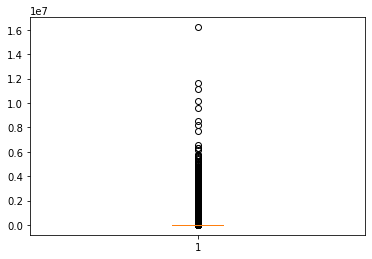

In [18]:
plt.boxplot(imdb_df['popularity'])

# it looks like most movies were rated by very few people
# there are many outliers above the 75th percentile (shown in the box plot)
# to make sure these extreme outliers are not biasing the genre analysis,
# let's use the median popularity as the gauge of success for each genre

In [19]:
# create a function for median popularity by genre

# testing code:
# test = genre_ratings_df.loc[genre_ratings_df['Action'] == 1] 
# test['popularity'].median() #1982.5

def get_med_popularity(column):
    """Calculate the median popularity for one of the genre columns in the genre_ratings_df DataFrame.
    
    Parameters
    ----------
    column : One of the genre columns in the genre_ratings_df DataFrame.  Include table name, for example
    genre_ratings_df['Action']

    Returns
    -------
    float64
    Median value for the 'popularity' column, using rows where the inputted column is equal to 1 (True)."""
    median_popularity = (genre_ratings_df.loc[column == 1]['popularity'].median())
    return median_popularity
    
get_med_popularity(genre_ratings_df['Action']) #1982.5

1982.5

In [20]:
# drop genres with small sample sizes from unique_genres_list

unique_genres_list.remove('Adult')
unique_genres_list.remove('Game-Show')
unique_genres_list.remove('Reality-TV')
unique_genres_list

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [21]:
#create list of median popularity values using list of unique genres

med_popularity_values = []

for g in unique_genres_list:
    p = get_med_popularity(genre_ratings_df[g])
    med_popularity_values.append(p)
    
med_popularity_values

[1982.5,
 1382.85,
 1150.35,
 914.4,
 1026.6,
 1945.45,
 389.4,
 907.2,
 595.2,
 1209.0,
 709.5,
 675.5,
 735.0,
 681.7,
 1280.6,
 405.0,
 1313.2,
 1118.75,
 1020.6,
 1205.25,
 1252.6,
 679.65]

In [22]:
# create dataframe of genres and median popularity values

genre_med_pop_df = pd.DataFrame()

genre_med_pop_df['genre'] = unique_genres_list
genre_med_pop_df['med_popularity'] = med_popularity_values

genre_med_pop_df = genre_med_pop_df.sort_values(by ='med_popularity', ascending=False)
genre_med_pop_df

,genre,med_popularity
0,Action,1982.50000
5,Crime,1945.45000
1,Adventure,1382.85000
16,Romance,1313.20000
14,Mystery,1280.60000
20,War,1252.60000
9,Fantasy,1209.00000
19,Thriller,1205.25000
2,Animation,1150.35000
17,Sci-Fi,1118.75000


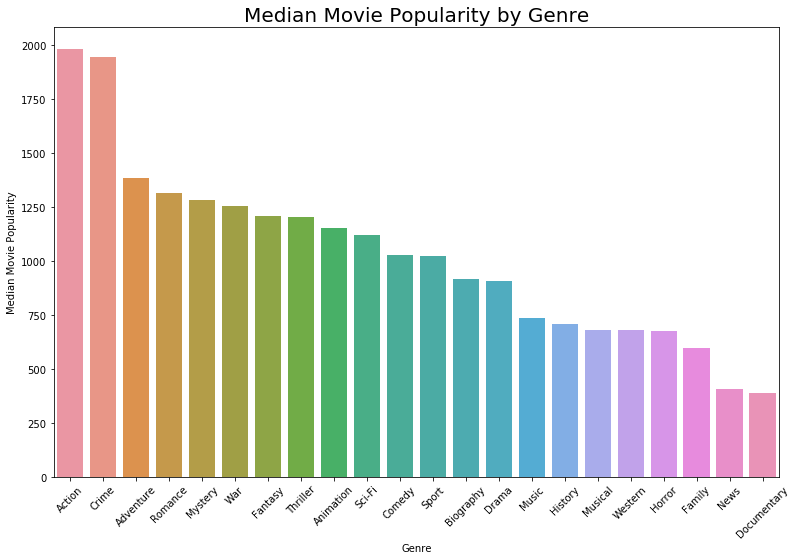

In [23]:
# plot genres by median popularity

fig, ax = plt.subplots(figsize=(13, 8.27))
ax = sns.barplot(x=genre_med_pop_df['genre'], y=genre_med_pop_df['med_popularity'])
ax.figsize=(20,10)
plt.xticks(rotation=45)
plt.title('Median Movie Popularity by Genre', fontsize = 20)
plt.xlabel('Genre')
plt.ylabel('Median Movie Popularity')
plt.show()

In [24]:
# create a function for mean popularity by genre, to check the effect of outliers

# testing code:
# test = genre_ratings_df.loc[genre_ratings_df['Action'] == 1] 
# test['popularity'].sum()/len(test) #119847
# (genre_ratings_df.loc[genre_ratings_df['Action'] == 1]['popularity'].sum())/(len(genre_ratings_df.loc[genre_ratings_df['Action'] == 1])) #119847

def get_avg_popularity(column):
    """Calculate the mean popularity for one of the genre columns in the genre_ratings_df DataFrame.
    
    Parameters
    ----------
    column : One of the genre columns in the genre_ratings_df DataFrame.  Include table name, for example
    genre_ratings_df['Action']

    Returns
    -------
    float64
    Mean value for the 'popularity' column, using rows where the inputted column is equal to 1 (True)."""
    sum_popularity = (genre_ratings_df.loc[column == 1]['popularity'].sum())
    len_popularity = (len(genre_ratings_df.loc[column == 1]))
    return sum_popularity/len_popularity
    
get_avg_popularity(genre_ratings_df['Action'])

128621.5717082179

In [25]:
#create list of average popularity values using list of unique genres

avg_popularity_values = []

for g in unique_genres_list:
    p = get_avg_popularity(genre_ratings_df[g])
    avg_popularity_values.append(p)
    
avg_popularity_values

[128621.5717082179,
 200458.85961538466,
 81618.30534407028,
 61143.87837121212,
 38015.549435975605,
 73497.29217062634,
 3443.0115875912406,
 36755.25282024479,
 23276.943372046455,
 109473.97829601991,
 30137.318462343097,
 24833.05049269453,
 26650.84817518248,
 21343.914410480345,
 70556.3194826867,
 2782.1156156156158,
 35102.57489719992,
 176183.96693548388,
 32001.976814988284,
 49814.29401225114,
 30245.943949044587,
 85346.19861111112]

In [26]:
# create dataframe of genres and average popularity values

genre_avg_pop_df = pd.DataFrame()

genre_avg_pop_df['genre'] = unique_genres_list
genre_avg_pop_df['avg_popularity'] = avg_popularity_values

genre_avg_pop_df = genre_avg_pop_df.sort_values(by ='avg_popularity', ascending=False)
genre_avg_pop_df

,genre,avg_popularity
1,Adventure,200458.85962
17,Sci-Fi,176183.96694
0,Action,128621.57171
9,Fantasy,109473.97830
21,Western,85346.19861
2,Animation,81618.30534
5,Crime,73497.29217
14,Mystery,70556.31948
3,Biography,61143.87837
19,Thriller,49814.29401


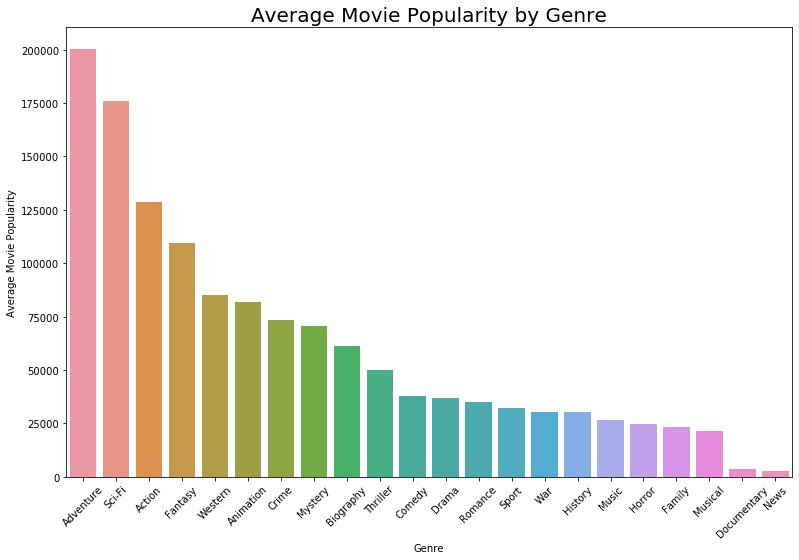

In [27]:
# plot genres by average popularity
# a few genres have moved - the effect of outliers
# Crime has moved down, Sci-Fi has moved up
# Action and Adventure are still in the top 3, but reversed
# this analysis shows the effect of blockbuster rated by thousands more users than most

fig, ax = plt.subplots(figsize=(13, 8.27))
ax = sns.barplot(x=genre_avg_pop_df['genre'], y=genre_avg_pop_df['avg_popularity'])
ax.figsize=(20,10)
plt.xticks(rotation=45)
plt.title('Average Movie Popularity by Genre', fontsize = 20)
plt.xlabel('Genre')
plt.ylabel('Average Movie Popularity')
plt.show()

In [28]:
# show median and mean popularity for each genre side by side, to make sure median makes the most sense

genre_med_avg_pop_df = pd.DataFrame()

genre_med_avg_pop_df['genre'] = unique_genres_list
genre_med_avg_pop_df['med_popularity'] = med_popularity_values
genre_med_avg_pop_df['avg_popularity'] = avg_popularity_values

genre_med_avg_pop_df

# yep, mean is waaay higher than median.  Use median to minimize the effect of outliers

,genre,med_popularity,avg_popularity
0,Action,1982.50000,128621.57171
1,Adventure,1382.85000,200458.85962
2,Animation,1150.35000,81618.30534
3,Biography,914.40000,61143.87837
4,Comedy,1026.60000,38015.54944
5,Crime,1945.45000,73497.29217
6,Documentary,389.40000,3443.01159
7,Drama,907.20000,36755.25282
8,Family,595.20000,23276.94337
9,Fantasy,1209.00000,109473.97830


### Action, Crime, and Adventure win!

Using the median popularity to estimate the success of each genre, Action, Crime, and Adventure emerge as the three most popular genres.  Interestingly, when the mean popularity is used, Sci-Fi moves up to the top 3, and Crime moves down a few notches.  Using the mean popularity takes into account the effect of huge outliers (blockbuster movies rated by many more users than most other films).  While the median is a better indicator of popular genres overall, it's interesting to note that Action and Adventure make the top 3 in both analyses.  Perhaps this means that movies in these two genres have the best chance of being generally popular and also being blockbusters.

## Question 2: Does runtime affect popularity within the recommended genres?

To answer this question, I first used scatter plots with regression lines to detect a correlation between runtime and popularity, as well as between runtime and average rating.  It turns out that both popularity and average rating are positively correlated with runtime in the three most popular genres, and in movies overall.  

Average rating is more strongly correlated with runtime than popularity is.  Since popularity is the product of average rating and number of ratings, this indicates that viewers appreciate longer movies and rate them higher, rather than that longer movies draw more viewers.

To get a sense of how runtime differs between popular and unpopular movies, I then separated the sample of movies into "more popular" movies (in the top 25% of popularity), and "less popular" movies (in the bottom 75% of popularity) in each of the three top genres.

In each genre, the median runtime was 11-15 minutes higher for the more popular movies.  The median runtimes for popular Action, Crime, and Adventure movies were 110, 106, and 105 minutes respectively.

In [29]:
# create dataframe for runtime analysis

runtime_ratings_df = genre_ratings_df
runtime_ratings_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.00000,77.00000,539.00000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.00000,"Biography,Drama",7.20000,43.00000,309.60000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,122.00000,Drama,6.90000,4517.00000,31167.30000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0100275,The Wandering Soap Opera,2017,80.00000,"Comedy,Drama,Fantasy",6.50000,119.00000,773.50000,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,tt0137204,Joe Finds Grace,2017,83.00000,"Adventure,Animation,Comedy",8.10000,263.00000,2130.30000,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50583,tt9904844,Ott Tänak: The Movie,2019,125.00000,Documentary,8.70000,218.00000,1896.60000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50584,tt9905412,Ottam,2019,120.00000,Drama,8.10000,505.00000,4090.50000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50585,tt9905462,Pengalila,2019,111.00000,Drama,8.40000,600.00000,5040.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50586,tt9911774,Padmavyuhathile Abhimanyu,2019,130.00000,Drama,8.40000,365.00000,3066.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Let's assume Microsoft wants to make "normal" movies, not short films or bizarrely long sagas
# drop movies with runtime outside the parameters of a "normal" movie

# a few movies have runtime over 4 hours - drop these (55 movies)
runtime_ratings_df = runtime_ratings_df.loc[runtime_ratings_df['runtime_minutes'] <= 240]

# some movies have runtime under 40 minutes - drop these (85 movies)
runtime_ratings_df = runtime_ratings_df.loc[runtime_ratings_df['runtime_minutes'] >= 40]

# runtime_ratings_df.info()
# runtime_ratings_df.describe()
runtime_ratings_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.00000,77.00000,539.00000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.00000,"Biography,Drama",7.20000,43.00000,309.60000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,122.00000,Drama,6.90000,4517.00000,31167.30000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0100275,The Wandering Soap Opera,2017,80.00000,"Comedy,Drama,Fantasy",6.50000,119.00000,773.50000,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,tt0137204,Joe Finds Grace,2017,83.00000,"Adventure,Animation,Comedy",8.10000,263.00000,2130.30000,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50583,tt9904844,Ott Tänak: The Movie,2019,125.00000,Documentary,8.70000,218.00000,1896.60000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50584,tt9905412,Ottam,2019,120.00000,Drama,8.10000,505.00000,4090.50000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50585,tt9905462,Pengalila,2019,111.00000,Drama,8.40000,600.00000,5040.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50586,tt9911774,Padmavyuhathile Abhimanyu,2019,130.00000,Drama,8.40000,365.00000,3066.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# create dataframes showing action, crime, and adventure movies

# create action df
runtime_action_df = runtime_ratings_df.loc[runtime_ratings_df['Action'] == 1]
runtime_action_df


,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.00000,77.00000,539.00000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,tt0249516,Foodfight!,2012,91.00000,"Action,Animation,Comedy",1.90000,8248.00000,15671.20000,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,tt0315642,Wazir,2016,103.00000,"Action,Crime,Drama",7.10000,15378.00000,109183.80000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,tt0364201,Aman Ke Farishtey,2016,137.00000,Action,6.40000,16.00000,102.40000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,tt0365907,A Walk Among the Tombstones,2014,114.00000,"Action,Crime,Drama",6.50000,105116.00000,683254.00000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50539,tt9815714,The Hard Way,2019,92.00000,Action,4.70000,1214.00000,5705.80000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50543,tt9817070,6.5 Toman Per Meter,2019,130.00000,"Action,Crime,Drama",7.80000,873.00000,6809.40000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50553,tt9826484,Trinity Seven: The Movie 2 - Heavens Library &...,2019,63.00000,"Action,Animation,Comedy",6.70000,37.00000,247.90000,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50556,tt9839040,Murphy's Law: Ghanoone Morfi,2019,90.00000,"Action,Comedy",4.90000,51.00000,249.90000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# create dataframes showing action, crime, and adventure movies

# create crime df
runtime_crime_df = runtime_ratings_df.loc[runtime_ratings_df['Crime'] == 1]
runtime_crime_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.00000,77.00000,539.00000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,tt0315642,Wazir,2016,103.00000,"Action,Crime,Drama",7.10000,15378.00000,109183.80000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,tt0365907,A Walk Among the Tombstones,2014,114.00000,"Action,Crime,Drama",6.50000,105116.00000,683254.00000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,tt0372538,Spy,2011,110.00000,"Action,Crime,Drama",6.60000,78.00000,514.80000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,tt0376479,American Pastoral,2016,108.00000,"Crime,Drama",6.10000,12898.00000,78677.80000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50504,tt9742422,Savage,2018,112.00000,"Action,Crime,Thriller",6.60000,33.00000,217.80000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
50535,tt9806304,Klubare,2018,100.00000,"Comedy,Crime,Music",2.20000,35.00000,77.00000,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
50540,tt9816970,Trace of Blood,2019,140.00000,"Crime,Drama,Thriller",6.60000,29.00000,191.40000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
50541,tt9817018,When the Moon Was Full,2019,137.00000,"Crime,Drama,Romance",6.70000,81.00000,542.70000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [33]:
# create adventure df

runtime_adventure_df = runtime_ratings_df.loc[runtime_ratings_df['Adventure'] == 1]
runtime_adventure_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
4,tt0137204,Joe Finds Grace,2017,83.00000,"Adventure,Animation,Comedy",8.10000,263.00000,2130.30000,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,tt0312305,Quantum Quest: A Cassini Space Odyssey,2010,45.00000,"Adventure,Animation,Sci-Fi",5.10000,287.00000,1463.70000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
23,tt0329539,Rice Girl,2014,95.00000,"Adventure,Comedy,Romance",6.10000,73.00000,445.30000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
25,tt0331314,Bunyan and Babe,2017,84.00000,"Adventure,Animation,Comedy",5.00000,302.00000,1510.00000,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,tt0337692,On the Road,2012,124.00000,"Adventure,Drama,Romance",6.10000,37886.00000,231104.60000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,tt9725216,Break Free: Two People. Two Years. One Dream,2019,125.00000,"Adventure,Documentary",7.00000,33.00000,231.00000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50499,tt9735672,Doraemon: Nobita's Chronicle of the Moon Explo...,2019,111.00000,"Action,Adventure,Animation",7.20000,62.00000,446.40000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50519,tt9783778,Adventures of Aladdin,2019,87.00000,"Adventure,Fantasy",1.70000,389.00000,661.30000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
50534,tt9806222,How I Taught Myself to Be a Child,2019,140.00000,"Adventure,Family",7.10000,33.00000,234.30000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
# create dataframes showing action, crime, and adventure movies

# create action + crime + adventure df
runtime_aca_df = runtime_ratings_df.loc[(runtime_ratings_df['Action'] == 1) | (runtime_ratings_df['Crime'] == 1) | (runtime_ratings_df['Adventure'] == 1)]
runtime_aca_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.00000,77.00000,539.00000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,tt0137204,Joe Finds Grace,2017,83.00000,"Adventure,Animation,Comedy",8.10000,263.00000,2130.30000,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,tt0249516,Foodfight!,2012,91.00000,"Action,Animation,Comedy",1.90000,8248.00000,15671.20000,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,tt0312305,Quantum Quest: A Cassini Space Odyssey,2010,45.00000,"Adventure,Animation,Sci-Fi",5.10000,287.00000,1463.70000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19,tt0315642,Wazir,2016,103.00000,"Action,Crime,Drama",7.10000,15378.00000,109183.80000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50543,tt9817070,6.5 Toman Per Meter,2019,130.00000,"Action,Crime,Drama",7.80000,873.00000,6809.40000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50553,tt9826484,Trinity Seven: The Movie 2 - Heavens Library &...,2019,63.00000,"Action,Animation,Comedy",6.70000,37.00000,247.90000,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50556,tt9839040,Murphy's Law: Ghanoone Morfi,2019,90.00000,"Action,Comedy",4.90000,51.00000,249.90000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50558,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,2018,120.00000,"Action,Animation,Sci-Fi",7.50000,24.00000,180.00000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Text(0, 0.5, 'Popularity')

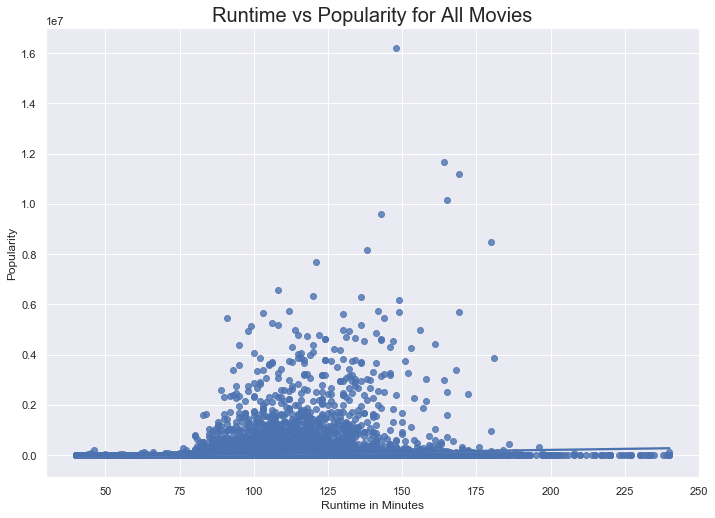

In [70]:
#plot runtime vs popularity for all movies

fig = sns.regplot(x="runtime_minutes", y="popularity", data=runtime_ratings_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime vs Popularity for All Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Popularity')
# fig.set_size_inches(18.5, 10.5, forward=True)

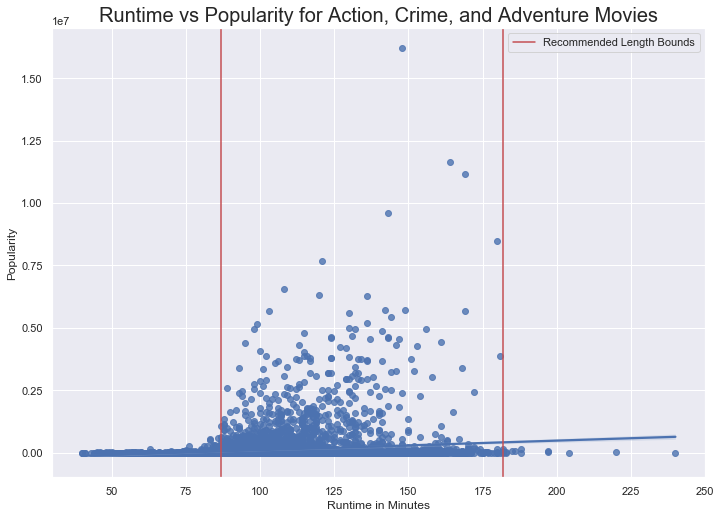

In [54]:
#plot runtime vs popularity for all movies

fig = sns.regplot(x="runtime_minutes", y="popularity", data=runtime_aca_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime vs Popularity for Action, Crime, and Adventure Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Popularity')

plt.axvline(87, color='r', label='Recommended Length Bounds')
plt.axvline(182, color='r')
plt.legend()

# fig.set_size_inches(18.5, 10.5, forward=True)

Text(0, 0.5, 'Popularity')

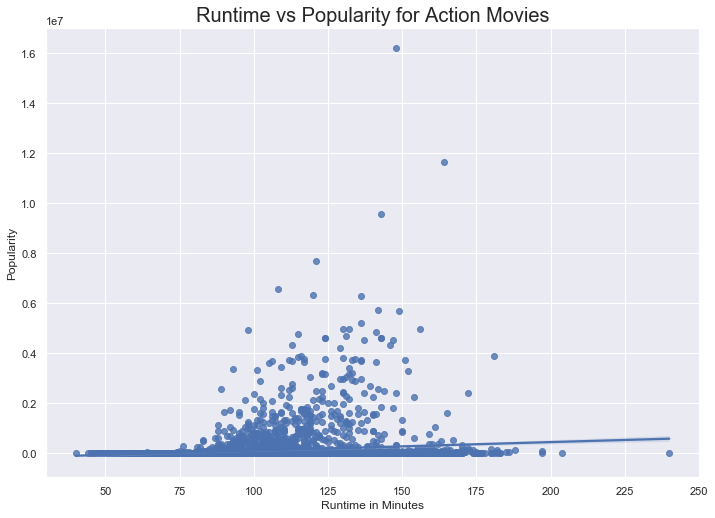

In [35]:
#plot runtime vs popularity for action movies

fig = sns.regplot(x="runtime_minutes", y="popularity", data=runtime_action_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime vs Popularity for Action Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Popularity')

Text(0, 0.5, 'Popularity')

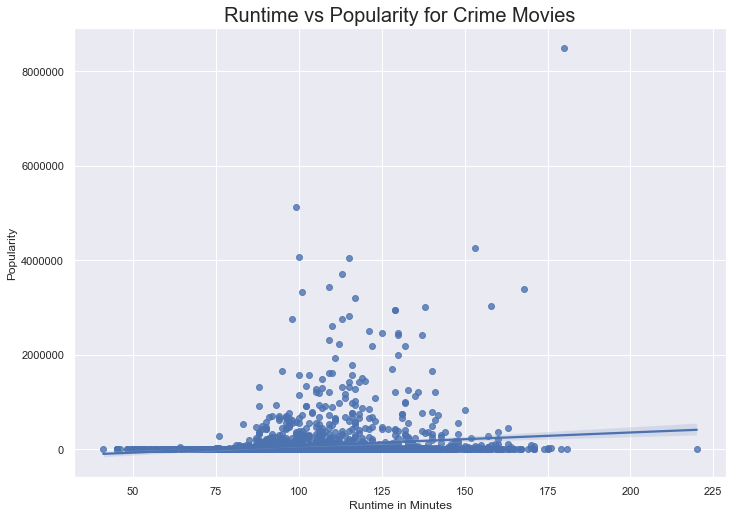

In [36]:
#plot runtime vs popularity for crime movies

fig = sns.regplot(x="runtime_minutes", y="popularity", data=runtime_crime_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime vs Popularity for Crime Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Popularity')
# fig.set_size_inches(18.5, 10.5, forward=True)

Text(0, 0.5, 'Popularity')

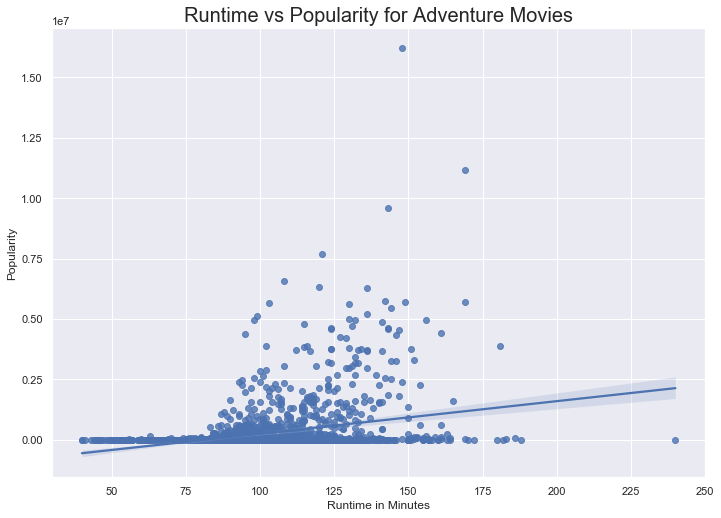

In [37]:
# plot runtime vs popularity for adventure movies

fig = sns.regplot(x="runtime_minutes", y="popularity", data=runtime_adventure_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime vs Popularity for Adventure Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Popularity')
# fig.set_size_inches(18.5, 10.5, forward=True)

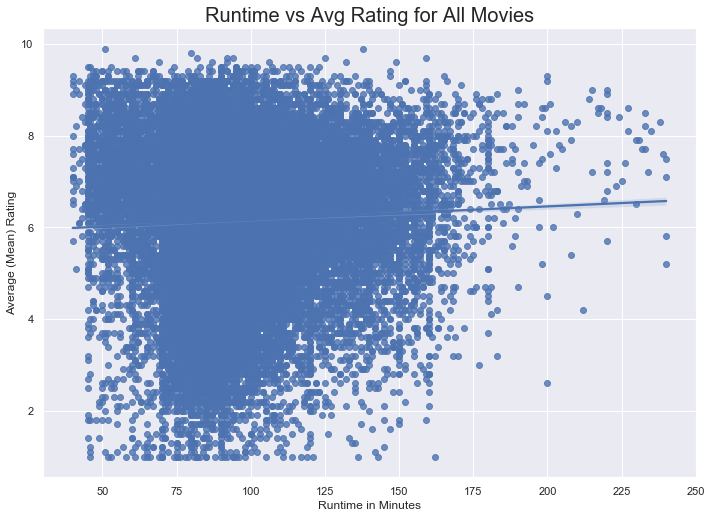

In [38]:
# plot runtime vs avg rating for all movies

fig = sns.regplot(x="runtime_minutes", y="averagerating", data=runtime_ratings_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime vs Avg Rating for All Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Average (Mean) Rating')
fig

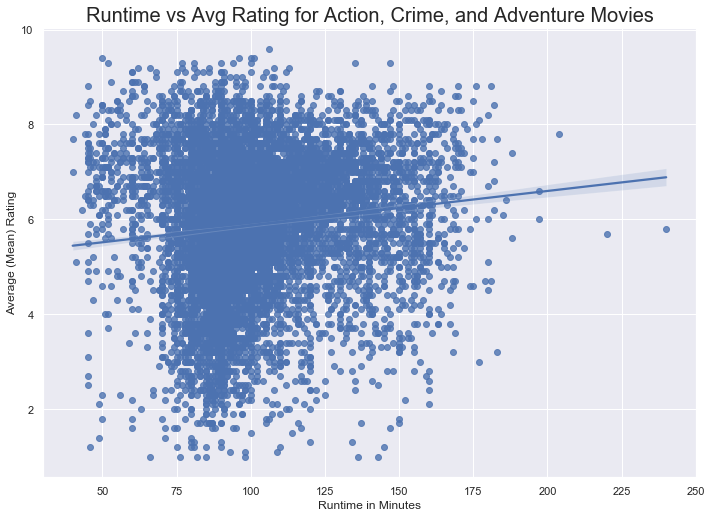

In [40]:
# plot runtime vs avg rating for action + crime + adventure movies

fig = sns.regplot(x="runtime_minutes", y="averagerating", data=runtime_aca_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime vs Avg Rating for Action, Crime, and Adventure Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Average (Mean) Rating')
fig

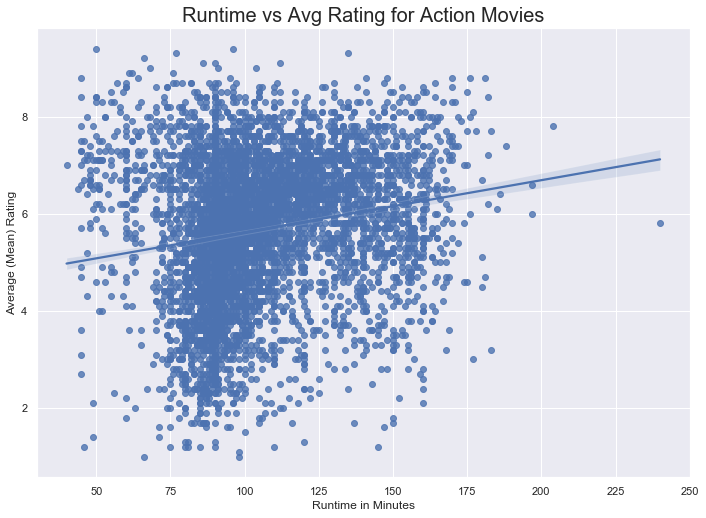

In [39]:
# plot runtime vs avg rating for action movies

fig = sns.regplot(x="runtime_minutes", y="averagerating", data=runtime_action_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime vs Avg Rating for Action Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Average (Mean) Rating')
fig

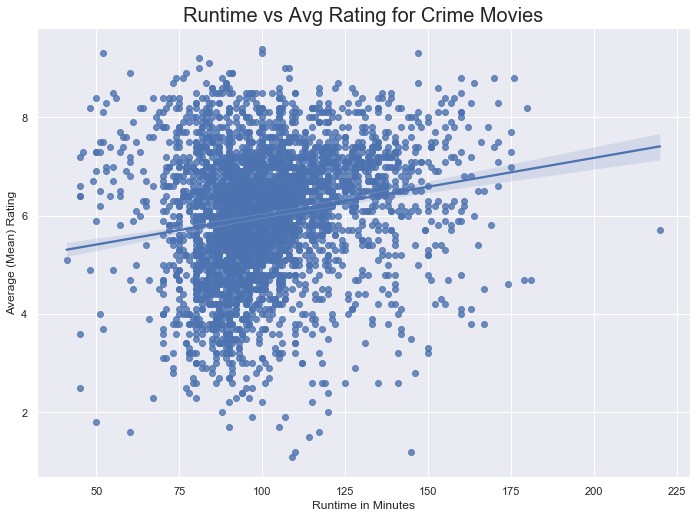

In [56]:
# plot runtime vs avg rating for crime movies

fig = sns.regplot(x="runtime_minutes", y="averagerating", data=runtime_crime_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime vs Avg Rating for Crime Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Average (Mean) Rating')
fig

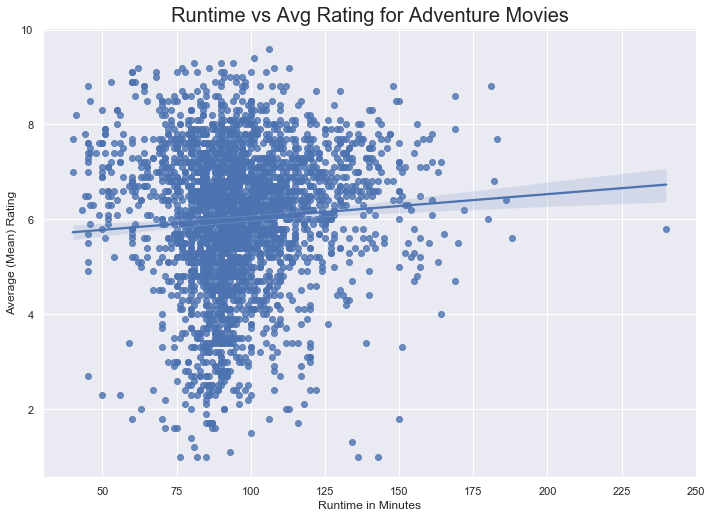

In [57]:
# plot runtime vs avg rating for adventure movies

fig = sns.regplot(x="runtime_minutes", y="averagerating", data=runtime_adventure_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime vs Avg Rating for Adventure Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Average (Mean) Rating')
fig

In [58]:
# create subsets of data on popular vs unpopular movies in action, crime, and adventure genres for comparison

# top 25% of movies by popularity
top_movies_25 = runtime_ratings_df.sort_values(by=['popularity'], ascending=False)
top_movies_25 = top_movies_25[0:int(len(top_movies_25)*0.25)]

# bottom 75% of movies by popularity
b_movies_75 = runtime_ratings_df.sort_values(by=['popularity'], ascending=True)
b_movies_75 = b_movies_75[0:int(len(b_movies_75)*0.75)]

# top 25% of action movies by popularity
top_ac_movies_25 = runtime_action_df.sort_values(by=['popularity'], ascending=False)
top_ac_movies_25 = top_ac_movies_25[0:int(len(top_ac_movies_25)*0.25)]

# bottom 75% of action movies by popularity
b_ac_movies_75 = runtime_action_df.sort_values(by=['popularity'], ascending=True)
b_ac_movies_75 = b_ac_movies_75[0:int(len(b_ac_movies_75)*0.75)]

# top 25% of crime movies by popularity
top_crime_movies_25 = runtime_crime_df.sort_values(by=['popularity'], ascending=False)
top_crime_movies_25 = top_crime_movies_25[0:int(len(top_crime_movies_25)*0.25)]

# bottom 75% of crime movies by popularity
b_crime_movies_75 = runtime_crime_df.sort_values(by=['popularity'], ascending=True)
b_crime_movies_75 = b_crime_movies_75[0:int(len(b_crime_movies_75)*0.75)]

# top 25% of adventure movies by popularity
top_ad_movies_25 = runtime_adventure_df.sort_values(by=['popularity'], ascending=False)
top_ad_movies_25 = top_ad_movies_25[0:int(len(top_ad_movies_25)*0.25)]

# bottom 75% of adventure by popularity
b_ad_movies_75 = runtime_adventure_df.sort_values(by=['popularity'], ascending=True)
b_ad_movies_75 = b_ad_movies_75[0:int(len(b_ad_movies_75)*0.75)]

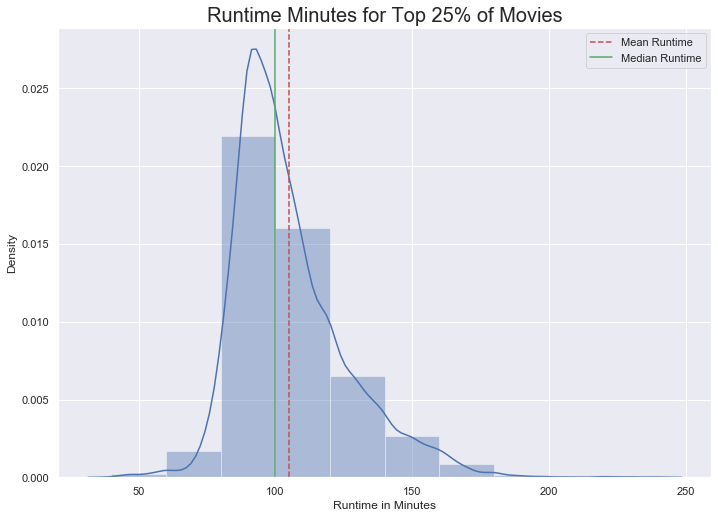

In [59]:
# histogram for runtime of top 0.25% of movies by popularity

fig = sns.distplot(a=top_movies_25['runtime_minutes'], bins=10)

mean=top_movies_25['runtime_minutes'].mean()
median=top_movies_25['runtime_minutes'].median()

fig.axvline(mean, color='r', linestyle='--', label='Mean Runtime')
fig.axvline(median, color='g', linestyle='-', label='Median Runtime')

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime Minutes for Top 25% of Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Density')
fig.legend()

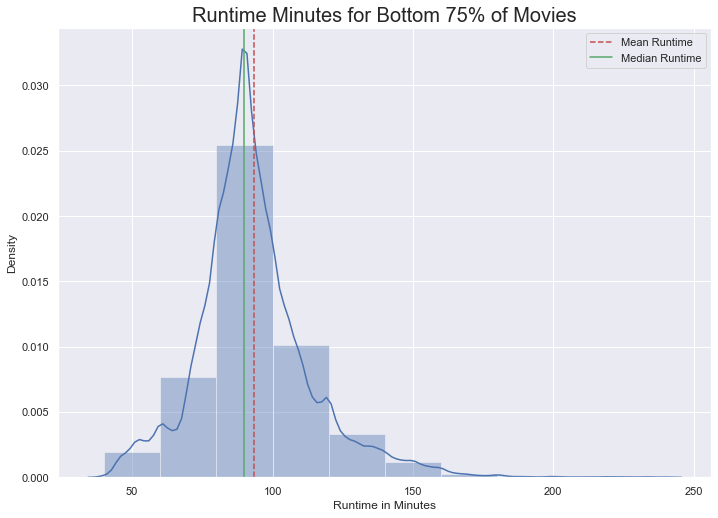

In [60]:
# histogram for runtime bottom 75% of movies by popularity

fig = sns.distplot(a=b_movies_75['runtime_minutes'], bins=10)

#plot mean, median

mean=b_movies_75['runtime_minutes'].mean()
median=b_movies_75['runtime_minutes'].median()
fig.axvline(mean, color='r', linestyle='--', label='Mean Runtime')
fig.axvline(median, color='g', linestyle='-', label='Median Runtime')

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime Minutes for Bottom 75% of Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Density')
fig.legend()

In [61]:
#print mean and median runtimes for popular and less popular movies

print('\n',
      'Mean Runtime, Top 25% of Movies:', 
      top_movies_25['runtime_minutes'].mean(),
      '    ',
      'Median Runtime, Top 25% of Movies:',
      top_movies_25['runtime_minutes'].median(),
      '\n',
      'Mean Runtime, Bottom 75% of Movies:',
      b_movies_75['runtime_minutes'].mean(),
      '  ',
      'Median Runtime, Bottom 75% of Movies:',
      b_movies_75['runtime_minutes'].median()
      )


 Mean Runtime, Top 25% of Movies: 105.04043767840152      Median Runtime, Top 25% of Movies: 100.0 
 Mean Runtime, Bottom 75% of Movies: 93.34847764034254    Median Runtime, Bottom 75% of Movies: 90.0


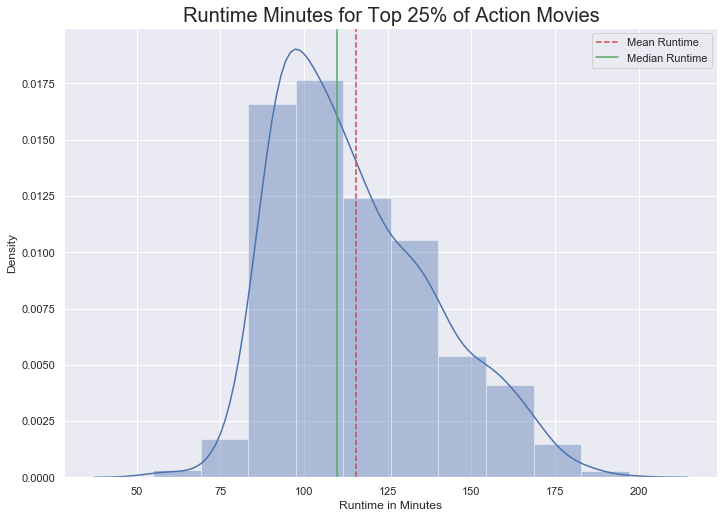

In [62]:
# histogram for runtime of top 25% of action movies by popularity

fig = sns.distplot(a=top_ac_movies_25['runtime_minutes'], bins=10)

mean=top_ac_movies_25['runtime_minutes'].mean()
median=top_ac_movies_25['runtime_minutes'].median()

fig.axvline(mean, color='r', linestyle='--', label='Mean Runtime')
fig.axvline(median, color='g', linestyle='-', label='Median Runtime')

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime Minutes for Top 25% of Action Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Density')
fig.legend()

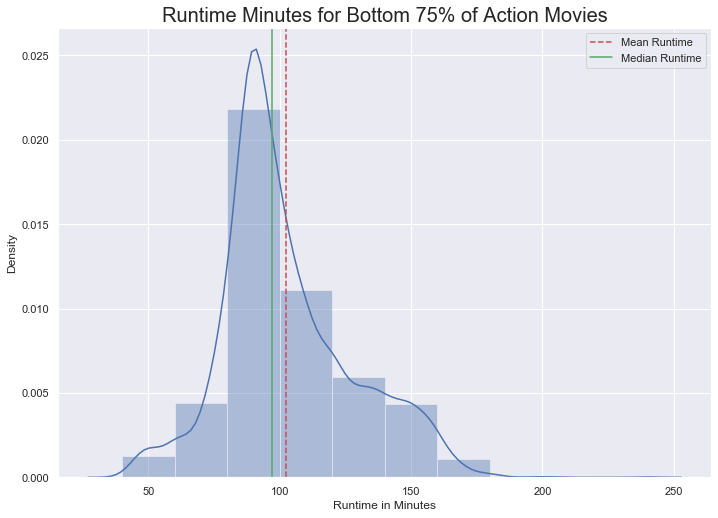

In [63]:
# histogram for runtime of bottom 75% of action movies by popularity

fig = sns.distplot(a=b_ac_movies_75['runtime_minutes'], bins=10)

mean=b_ac_movies_75['runtime_minutes'].mean()
median=b_ac_movies_75['runtime_minutes'].median()

fig.axvline(mean, color='r', linestyle='--', label='Mean Runtime')
fig.axvline(median, color='g', linestyle='-', label='Median Runtime')

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime Minutes for Bottom 75% of Action Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Density')
fig.legend()

In [64]:
# print mean and median runtimes for popular and less popular action movies

print('\n',
      'Mean Runtime, Top 25% of Action Movies:', 
      top_ac_movies_25['runtime_minutes'].mean(),
      '    ',
      'Median Runtime, Top 25% of Action Movies:',
      top_ac_movies_25['runtime_minutes'].median(),
      '\n',
      'Mean Runtime, Bottom 75% of Action Movies:',
      b_ac_movies_75['runtime_minutes'].mean(),
      ' ',
      'Median Runtime, Bottom 75% of Action Movies:',
      b_ac_movies_75['runtime_minutes'].median()
      )


 Mean Runtime, Top 25% of Action Movies: 115.46854182087343      Median Runtime, Top 25% of Action Movies: 110.0 
 Mean Runtime, Bottom 75% of Action Movies: 102.54969173859433   Median Runtime, Bottom 75% of Action Movies: 97.0


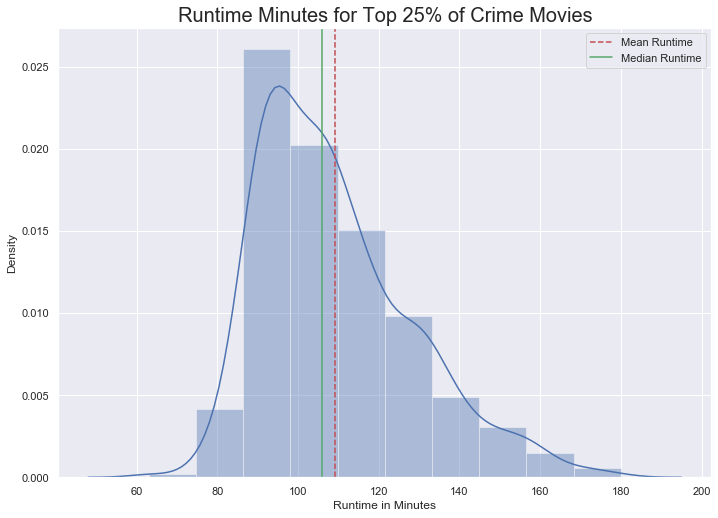

In [65]:
# histogram for runtime of top 25% of crime movies by popularity

fig = sns.distplot(a=top_crime_movies_25['runtime_minutes'], bins=10)

mean=top_crime_movies_25['runtime_minutes'].mean()
median=top_crime_movies_25['runtime_minutes'].median()

fig.axvline(mean, color='r', linestyle='--', label='Mean Runtime')
fig.axvline(median, color='g', linestyle='-', label='Median Runtime')

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime Minutes for Top 25% of Crime Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Density')
fig.legend()

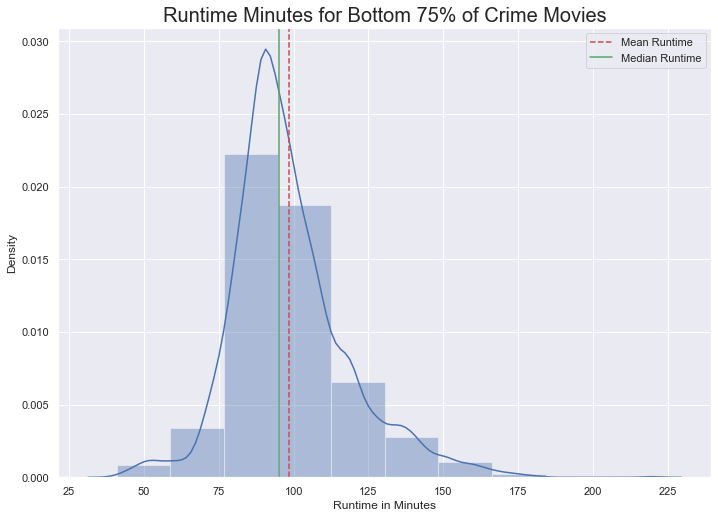

In [66]:
# histogram for runtime of bottom 75% of crime movies by popularity

fig = sns.distplot(a=b_crime_movies_75['runtime_minutes'], bins=10)

mean=b_crime_movies_75['runtime_minutes'].mean()
median=b_crime_movies_75['runtime_minutes'].median()

fig.axvline(mean, color='r', linestyle='--', label="Mean Runtime")
fig.axvline(median, color='g', linestyle='-', label='Median Runtime')

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime Minutes for Bottom 75% of Crime Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Density')
fig.legend()

In [67]:
# print mean and median runtimes for popular and less popular crime movies

print('\n',
      'Mean Runtime, Top 25% of Crime Movies:', 
      top_crime_movies_25['runtime_minutes'].mean(),
      '   ',
      'Median Runtime, Top 25% of Crime Movies:',
      top_crime_movies_25['runtime_minutes'].median(),
      '\n',
      'Mean Runtime, Bottom 75% of Crime Movies:',
      b_crime_movies_75['runtime_minutes'].mean(),
      ' ',
      'Median Runtime, Bottom 75% of Crime Movies:',
      b_crime_movies_75['runtime_minutes'].median()
      )


 Mean Runtime, Top 25% of Crime Movies: 109.20108108108109     Median Runtime, Top 25% of Crime Movies: 106.0 
 Mean Runtime, Bottom 75% of Crime Movies: 98.59135135135135   Median Runtime, Bottom 75% of Crime Movies: 95.0


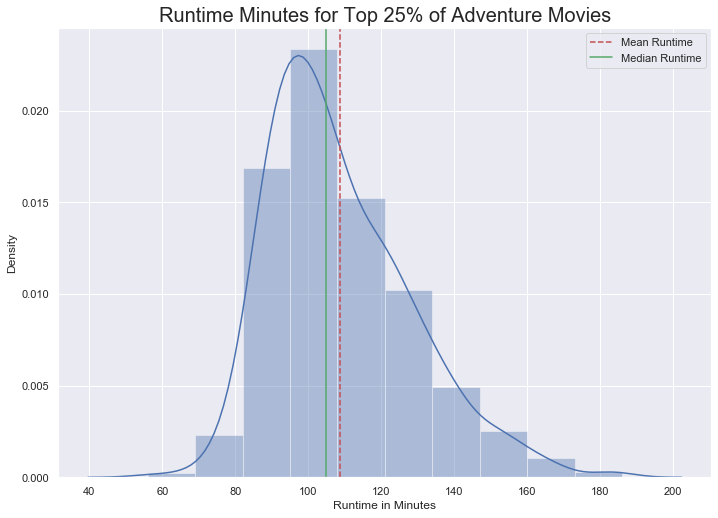

In [68]:
# histogram for runtime of top 25% of adventure movies by popularity

fig = sns.distplot(a=top_ad_movies_25['runtime_minutes'], bins=10)

mean=top_ad_movies_25['runtime_minutes'].mean()
median=top_ad_movies_25['runtime_minutes'].median()

fig.axvline(mean, color='r', linestyle='--', label='Mean Runtime')
fig.axvline(median, color='g', linestyle='-', label='Median Runtime')

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime Minutes for Top 25% of Adventure Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Density')
fig.legend()

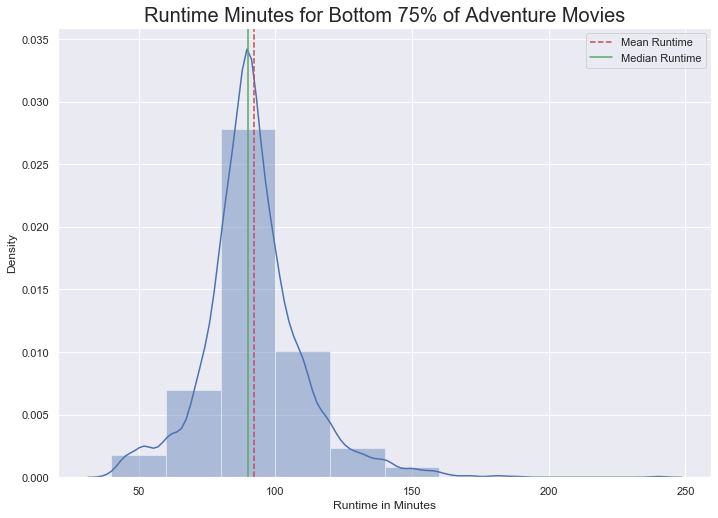

In [69]:
# histogram for runtime of bottom 75% of adventure movies by popularity

fig = sns.distplot(a=b_ad_movies_75['runtime_minutes'], bins=10)

mean=b_ad_movies_75['runtime_minutes'].mean()
median=b_ad_movies_75['runtime_minutes'].median()

fig.axvline(mean, color='r', linestyle='--', label='Mean Runtime')
fig.axvline(median, color='g', linestyle='-', label='Median Runtime')

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_title('Runtime Minutes for Bottom 75% of Adventure Movies', fontsize=20)
fig.set_xlabel('Runtime in Minutes')
fig.set_ylabel('Density')
fig.legend()

In [70]:
#print mean and median runtimes for popular and less popular adventure movies

print('\n',
      'Mean Runtime, Top 25% of Adventure Movies:', 
      top_ad_movies_25['runtime_minutes'].mean(),
      '   ',
      'Median Runtime, Top 25% of Adventure Movies:',
      top_ad_movies_25['runtime_minutes'].median(),
      '\n',
      'Mean Runtime, Bottom 75% of Adventure Movies:',
      b_ad_movies_75['runtime_minutes'].mean(),
      ' ',
      'Median Runtime, Bottom 75% Adventure Movies:',
      b_ad_movies_75['runtime_minutes'].median()
      )


 Mean Runtime, Top 25% of Adventure Movies: 108.71951219512195     Median Runtime, Top 25% of Adventure Movies: 105.0 
 Mean Runtime, Bottom 75% of Adventure Movies: 92.02707581227436   Median Runtime, Bottom 75% Adventure Movies: 90.0


### Longer movies win!

In all three of the most popular genres, the median length of the top 25% of movies by popularity was significantly (11-15 minutes) longer than the median length of the bottom 75%.  Microsoft should aim for their movies to be between 105 and 110 minutes long.

Specifically, the median runtimes for popular movies in the Action, Crime, and Adventure genres were 110, 106, and 105 minutes respectively.

## Question 3: Which actors and directors are associated with popular movies?

In this section I provided Microsoft with lists of the 30 actors and directors who have made the most top movies in each of the three top genres.  For this analysis, I defined top movies as movies in the top 5% of popularity, regardless of genre.  I then found which actors and directors had made the most Action, Crime, and Adventure movies within this top 5% (2530 movies). 

In [71]:
# find IMDb role categories

imdb_title_principals_df['category'].value_counts()
# imdb_title_principals_df.head()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

In [72]:
# create df of the top 5% of movies by popularity

top_movies = genre_ratings_df.loc[genre_ratings_df['popularity'] > genre_ratings_df['popularity'].quantile(0.95)]

top_movies.describe()
top_movies #2530 movies

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
19,tt0315642,Wazir,2016,103.00000,"Action,Crime,Drama",7.10000,15378.00000,109183.80000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,tt0337692,On the Road,2012,124.00000,"Adventure,Drama,Romance",6.10000,37886.00000,231104.60000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
30,tt0359950,The Secret Life of Walter Mitty,2013,114.00000,"Adventure,Comedy,Drama",7.30000,275300.00000,2009690.00000,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,tt0360556,Fahrenheit 451,2018,100.00000,"Drama,Sci-Fi,Thriller",4.90000,14469.00000,70898.10000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
34,tt0365907,A Walk Among the Tombstones,2014,114.00000,"Action,Crime,Drama",6.50000,105116.00000,683254.00000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49196,tt8632862,Fahrenheit 11/9,2018,128.00000,Documentary,6.70000,11628.00000,77907.60000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49748,tt8954732,The Princess Switch,2018,101.00000,Romance,6.00000,13993.00000,83958.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50282,tt9412098,Fyre,2019,97.00000,"Documentary,Music",7.30000,25387.00000,185325.10000,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
50339,tt9495224,Black Mirror: Bandersnatch,2018,90.00000,"Drama,Mystery,Sci-Fi",7.30000,91349.00000,666847.70000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [73]:
# left join principals data to find which people (actors, directors, and others) are in which movies
top_movies_principals = top_movies.merge(imdb_title_principals_df, on='tconst')
#inner and left joins yield same result, so all movies do have some principals

# drop unnecessary columns
top_movies_principals.drop(columns=['ordering','job','characters'], inplace=True)

# restrict df to categories of interest - actor, actress, director
top_movies_principals = top_movies_principals.loc[top_movies_principals['category'].isin (['actor',
                                                                                           'actress',
                                                                                           'director'])]


top_movies_principals
# top_movies_principals.describe()
# top_movies_principals.info()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,nconst,category
1,tt0315642,Wazir,2016,103.00000,"Action,Crime,Drama",7.10000,15378.00000,109183.80000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nm0000821,actor
2,tt0315642,Wazir,2016,103.00000,"Action,Crime,Drama",7.10000,15378.00000,109183.80000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nm1027719,actor
3,tt0315642,Wazir,2016,103.00000,"Action,Crime,Drama",7.10000,15378.00000,109183.80000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nm2390814,actress
4,tt0315642,Wazir,2016,103.00000,"Action,Crime,Drama",7.10000,15378.00000,109183.80000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nm1303433,actor
5,tt0315642,Wazir,2016,103.00000,"Action,Crime,Drama",7.10000,15378.00000,109183.80000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nm2349060,director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25127,tt9495224,Black Mirror: Bandersnatch,2018,90.00000,"Drama,Mystery,Sci-Fi",7.30000,91349.00000,666847.70000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,nm0971135,actor
25128,tt9495224,Black Mirror: Bandersnatch,2018,90.00000,"Drama,Mystery,Sci-Fi",7.30000,91349.00000,666847.70000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,nm1546686,actress
25129,tt9495224,Black Mirror: Bandersnatch,2018,90.00000,"Drama,Mystery,Sci-Fi",7.30000,91349.00000,666847.70000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,nm5219130,actor
25130,tt9495224,Black Mirror: Bandersnatch,2018,90.00000,"Drama,Mystery,Sci-Fi",7.30000,91349.00000,666847.70000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,nm1720541,director


In [74]:
# count movies by principal, to find which principals have made the most top movies in top genres

principals_pivot = top_movies_principals.pivot_table(values=['Action','Crime','Adventure'], index='nconst', aggfunc='sum')

# get a sense of how many top movies the top principals are in
principals_pivot.describe() #75th percentile = 1 movie for all 3 genres
principals_pivot.quantile(0.95) #95th percentile = 2 movies for all 3 genres

principals_pivot

,Action,Adventure,Crime
nconst,,,
nm0000092,0,1,0
nm0000093,4,1,1
nm0000095,0,0,0
nm0000096,0,0,0
nm0000098,1,1,3
...,...,...,...
nm9948845,0,0,0
nm9966942,0,0,0
nm9985593,0,0,0


In [75]:
# join principals' names and years of birth

principals_list = principals_pivot.merge(imdb_name_df, on='nconst', how='left')

# remove unnecessary columns
principals_list = principals_list.drop(columns=['known_for_titles','death_year','primary_profession']) 

# principals_list.duplicated().sum() #no duplicates

principals_list

,nconst,Action,Adventure,Crime,primary_name,birth_year
0,nm0000092,0,1,0,John Cleese,1939.00000
1,nm0000093,4,1,1,Brad Pitt,1963.00000
2,nm0000095,0,0,0,Woody Allen,1935.00000
3,nm0000096,0,0,0,Gillian Anderson,1968.00000
4,nm0000098,1,1,3,Jennifer Aniston,1969.00000
...,...,...,...,...,...,...
6169,nm9948845,0,0,0,Diego Cortina Autrey,nan
6170,nm9966942,0,0,0,Ania Josse,nan
6171,nm9985593,0,0,0,James Simone,nan
6172,nm9985727,0,0,0,Carlos Peralta,nan


In [76]:
#for context, add back in movie titles and genres

#first, update names to avoid merge conflicts
principals_list.rename(columns = {'Action': 'Total Action Movies',
                                        'Adventure': 'Total Adventure Movies',
                                        'Crime': 'Total Crime Movies'},
                      inplace=True)
principals_list

,nconst,Total Action Movies,Total Adventure Movies,Total Crime Movies,primary_name,birth_year
0,nm0000092,0,1,0,John Cleese,1939.00000
1,nm0000093,4,1,1,Brad Pitt,1963.00000
2,nm0000095,0,0,0,Woody Allen,1935.00000
3,nm0000096,0,0,0,Gillian Anderson,1968.00000
4,nm0000098,1,1,3,Jennifer Aniston,1969.00000
...,...,...,...,...,...,...
6169,nm9948845,0,0,0,Diego Cortina Autrey,nan
6170,nm9966942,0,0,0,Ania Josse,nan
6171,nm9985593,0,0,0,James Simone,nan
6172,nm9985727,0,0,0,Carlos Peralta,nan


In [77]:
#for context, add back in movie titles and genres

principals_movies_list = principals_list.merge(top_movies_principals, on='nconst', how='left')

principals_movies_list
# principals_movies_list.info()

,nconst,Total Action Movies,Total Adventure Movies,Total Crime Movies,primary_name,birth_year,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,category
0,nm0000092,0,1,0,John Cleese,1939.00000,tt1053810,The Big Year,2011,100.00000,Comedy,6.20000,39522.00000,245036.40000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,actor
1,nm0000092,0,1,0,John Cleese,1939.00000,tt1449283,Winnie the Pooh,2011,63.00000,"Adventure,Animation,Comedy",7.20000,19605.00000,141156.00000,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,actor
2,nm0000093,4,1,1,Brad Pitt,1963.00000,tt0478304,The Tree of Life,2011,139.00000,"Drama,Fantasy",6.80000,156266.00000,1062608.80000,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,actor
3,nm0000093,4,1,1,Brad Pitt,1963.00000,tt0816711,World War Z,2013,116.00000,"Action,Adventure,Horror",7.00000,553751.00000,3876257.00000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,actor
4,nm0000093,4,1,1,Brad Pitt,1963.00000,tt1001526,Megamind,2010,95.00000,"Action,Animation,Comedy",7.30000,207488.00000,1514662.40000,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,actor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12448,nm9948845,0,0,0,Diego Cortina Autrey,nan,tt6155172,Roma,2018,135.00000,Drama,7.80000,106768.00000,832790.40000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,actor
12449,nm9966942,0,0,0,Ania Josse,nan,tt4669264,Beirut,2018,109.00000,"Drama,Thriller",6.40000,14988.00000,95923.20000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,actress
12450,nm9985593,0,0,0,James Simone,nan,tt3398268,When Marnie Was There,2014,103.00000,"Animation,Drama,Family",7.70000,24586.00000,189312.20000,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,director
12451,nm9985727,0,0,0,Carlos Peralta,nan,tt6155172,Roma,2018,135.00000,Drama,7.80000,106768.00000,832790.40000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,actor


In [78]:
# rename columns for clarity
principals_movies_list.rename(columns = {'nconst': 'Principal IMDB ID',
                                         'primary_name': 'Principal Name',
                                         'birth_year': 'Principal Birth Year',
                                         'tconst': 'Movie IMDB ID',
                                         'primary_title': 'Movie Title',
                                         'start_year': 'Movie Year',
                                         'runtime_minutes': 'Runtime Minutes',
                                         'genres': 'Movie Genres',
                                         'averagerating': 'Movie Average Rating',
                                         'numvotes': 'Total Rating Votes',
                                         'popularity': 'Movie Popularity (Rating x Votes)',
                                         'category': 'Principal Role in Movie'}, inplace=True)


# recorder columns logically 
principals_movies_list = principals_movies_list[['Principal Name',
                                                'Principal Birth Year',
                                                'Principal IMDB ID',
                                                'Total Action Movies',
                                                'Total Crime Movies',
                                                'Total Adventure Movies',
                                                'Movie Title',
                                                'Movie Year',
                                                'Movie IMDB ID',
                                                'Principal Role in Movie',
                                                'Movie Average Rating',
                                                'Total Rating Votes',
                                                'Movie Popularity (Rating x Votes)',
                                                'Movie Genres'
                                                ]
                                               ]


#replace "actress" values with "actor"
principals_movies_list['Principal Role in Movie'].replace('actress','actor',inplace=True)

#reset index
principals_movies_list.reset_index(drop=True, inplace=True)

principals_movies_list
# this cleaned-up principals list can be given to Microsoft analysts for their own referencing
# the total movie counts are obviously repetitive, but this table provides a detailed view of all the 
# movies a principal has made

,Principal Name,Principal Birth Year,Principal IMDB ID,Total Action Movies,Total Crime Movies,Total Adventure Movies,Movie Title,Movie Year,Movie IMDB ID,Principal Role in Movie,Movie Average Rating,Total Rating Votes,Movie Popularity (Rating x Votes),Movie Genres
0,John Cleese,1939.00000,nm0000092,0,0,1,The Big Year,2011,tt1053810,actor,6.20000,39522.00000,245036.40000,Comedy
1,John Cleese,1939.00000,nm0000092,0,0,1,Winnie the Pooh,2011,tt1449283,actor,7.20000,19605.00000,141156.00000,"Adventure,Animation,Comedy"
2,Brad Pitt,1963.00000,nm0000093,4,1,1,The Tree of Life,2011,tt0478304,actor,6.80000,156266.00000,1062608.80000,"Drama,Fantasy"
3,Brad Pitt,1963.00000,nm0000093,4,1,1,World War Z,2013,tt0816711,actor,7.00000,553751.00000,3876257.00000,"Action,Adventure,Horror"
4,Brad Pitt,1963.00000,nm0000093,4,1,1,Megamind,2010,tt1001526,actor,7.30000,207488.00000,1514662.40000,"Action,Animation,Comedy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12448,Diego Cortina Autrey,nan,nm9948845,0,0,0,Roma,2018,tt6155172,actor,7.80000,106768.00000,832790.40000,Drama
12449,Ania Josse,nan,nm9966942,0,0,0,Beirut,2018,tt4669264,actor,6.40000,14988.00000,95923.20000,"Drama,Thriller"
12450,James Simone,nan,nm9985593,0,0,0,When Marnie Was There,2014,tt3398268,director,7.70000,24586.00000,189312.20000,"Animation,Drama,Family"
12451,Carlos Peralta,nan,nm9985727,0,0,0,Roma,2018,tt6155172,actor,7.80000,106768.00000,832790.40000,Drama


In [79]:
# create a function to find principals by role and genre

def find_principals(role, genre, num_people):
    """Search principals_movies_list DataFrame for specific combinations of role and genre.
    
    Parameters
    ----------
    role : One of the values in the 'Principal Role in Movie' column in the principals_movies_list
           DataFrame.  The two options are 'actor' and 'director'.
    genre : One of the values from the 'Movie Genres' column in the principals_movies_list DataFrame.
            Do not include table name, for example: 'Action'
    num_people : Integer.  Length of the returned DataFrame.

    Returns
    -------
    DataFrame
    Shows name of principals and how many movies they made in the selected genre, ranked in descending order
    of number of movies.
    """
    df = principals_movies_list.loc[principals_movies_list['Principal Role in Movie'] == role]
    df = df[['Principal Name','Total '+genre+' Movies']].drop_duplicates()
    df.sort_values(by=['Total '+genre+' Movies'], ascending=False, inplace=True)
    return df[:num_people]

find_principals('actor','Action', 10) #testing function

,Principal Name,Total Action Movies
4870,Dwayne Johnson,16
2634,Jason Statham,15
1173,Liam Neeson,14
7950,Chris Hemsworth,13
90,Nicolas Cage,11
707,Bruce Willis,11
2572,Ryan Reynolds,10
363,Samuel L. Jackson,10
3223,Gerard Butler,10
667,Mark Wahlberg,10


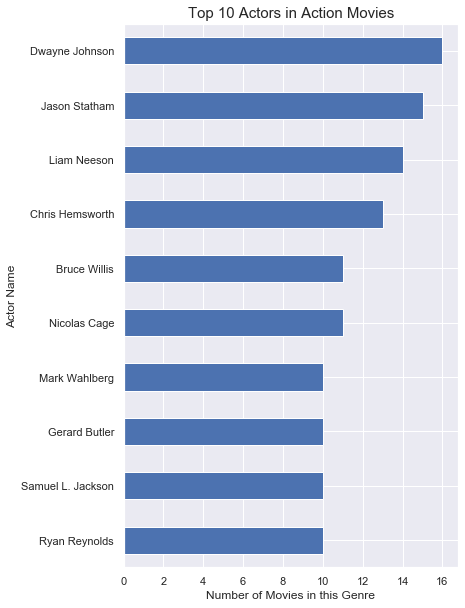

In [92]:
# create visualizations to show the top actors in top genres (Action, Crime, Adventure)
# start with Action

df = find_principals('actor','Action', 10).sort_values(by='Total Action Movies', ascending=True)

ax = df.plot(kind='barh', x='Principal Name', rot=0, figsize=(6,10))
ax.set_xlabel("Number of Movies in this Genre")
ax.set_ylabel("Actor Name")
ax.set_title('Top 10 Actors in Action Movies',fontsize= 15)
ax.get_legend().remove()

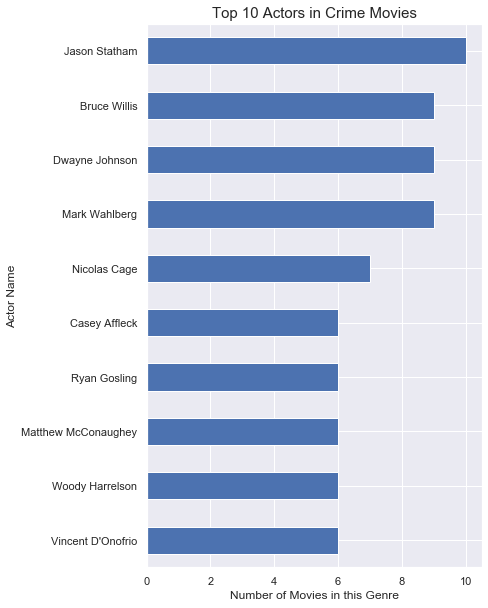

In [87]:
# now Crime!

df = find_principals('actor','Crime', 10).sort_values(by='Total Crime Movies', ascending=True)

ax = df.plot(kind='barh', x='Principal Name', rot=0, figsize=(6,10))

ax.set_xlabel("Number of Movies in this Genre")
ax.set_ylabel("Actor Name")
ax.set_title('Top 10 Actors in Crime Movies',fontsize= 15)
ax.get_legend().remove()

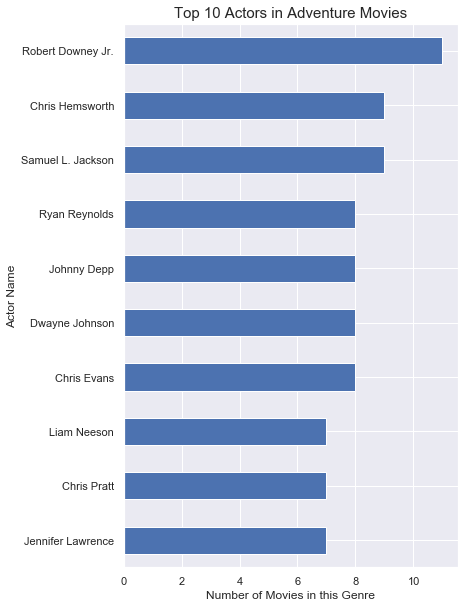

In [88]:
# try Adventure!

df = find_principals('actor','Adventure', 10).sort_values(by='Total Adventure Movies', ascending=True)

ax = df.plot(kind='barh', x='Principal Name', rot=0, figsize=(6,10))

ax.set_xlabel("Number of Movies in this Genre")
ax.set_ylabel("Actor Name")
ax.set_title('Top 10 Actors in Adventure Movies',fontsize= 15)
ax.get_legend().remove()

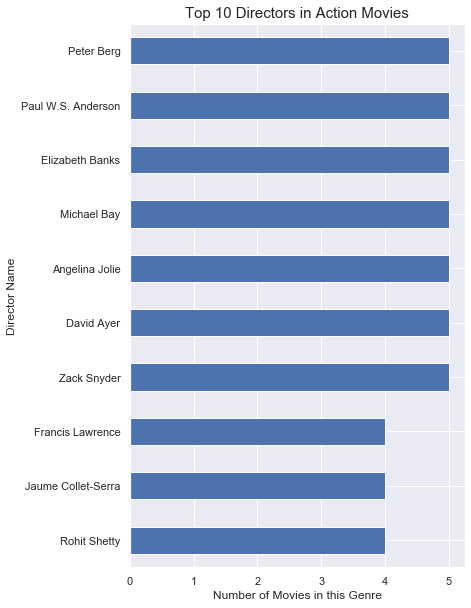

In [89]:
# let's get directors!
# start with Action

df = find_principals('director','Action', 10).sort_values(by='Total Action Movies', ascending=True)

ax = df.plot(kind='barh', x='Principal Name', rot=0, figsize=(6,10))
ax.set_xlabel("Number of Movies in this Genre")
ax.set_ylabel("Director Name")
ax.set_title('Top 10 Directors in Action Movies',fontsize= 15)
ax.get_legend().remove()

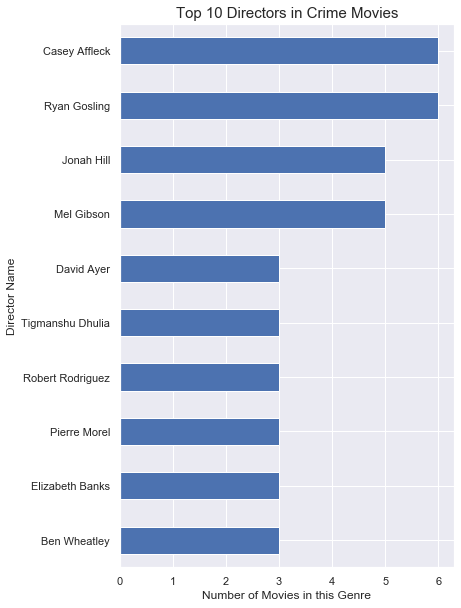

In [90]:
# let's get directors!
# now Crime

df = find_principals('director','Crime', 10).sort_values(by='Total Crime Movies', ascending=True)

ax = df.plot(kind='barh', x='Principal Name', rot=0, figsize=(6,10))
ax.set_xlabel("Number of Movies in this Genre")
ax.set_ylabel("Director Name")
ax.set_title('Top 10 Directors in Crime Movies',fontsize= 15)
ax.get_legend().remove()

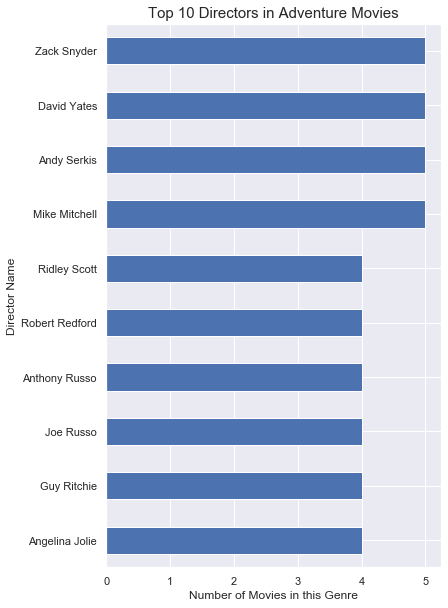

In [91]:
# let's get directors!
# now Adventure

df = find_principals('director','Adventure', 10).sort_values(by='Total Adventure Movies', ascending=True)

ax = df.plot(kind='barh', x='Principal Name', rot=0, figsize=(6,10))
ax.set_xlabel("Number of Movies in this Genre")
ax.set_ylabel("Director Name")
ax.set_title('Top 10 Directors in Adventure Movies',fontsize= 15)
ax.get_legend().remove()

### Let's get recruiting!

This analysis provides Microsoft with lists of actors and directors who draw large audiences and make highly rated films.  To create a few "big win" movies to build its brand, Microsoft should consider recruiting these individuals.

## Conclusions

### Recommendations:

- To successfully break into the streaming movie business, Microsoft should focus on Action, Crime, and Adventure movies.  These genres have the highest median popularity, defined as a movie's average rating times the number of people who rated it.

- Microsoft should make movies that are around 105-110 minutes long.  In all three of the top genres, the median length of the top 25% of movies have runtimes in this range.  The bottom 75% of movies have median runtimes around 90-97 minutes.

- I provided lists of the actors and directors who have made the most popular movies in each of the top three genres.  For this part of the analysis, "popular movies" is defined as movies in the top 5% of popularity among all movies.  I then found which actors and directors were associated with movies in the top 3 genres within this top 5%.  These lists can serve as a starting point for recruiting actors and directors who are highly rated and draw a large audience.

### Further investigation:

While this analysis provides some direction for Microsoft, other questions should be answered to fully solve this business problem.

For example, although runtime is correlated with ratings and popularity, it's not clear that increased runtime is the cause of increased popularity.  Both factors might share a common cause, such as a large production budget.

In general, a budget analysis by genre would be helpful so Microsoft can predict the return on investment of its movies.  While they need a few hit movies to lure new customers, eventually they will need to make the subscription service profitable.  It is possible that the most popular genres are also the most expensive, and that by going down a few notches to Romance or Mystery, they could achieve greater profitability.
